# Аршанов Глеб Олегович ИУ5-22М

## Задача №1.

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".

In [31]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
%matplotlib inline

sns.set(style="ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [33]:
pd.set_option("display.width", 70)

In [34]:
data = pd.read_csv("telecom_users.csv", index_col = 0)

data.rename(columns={"Unnamed: 0" : "id"}, inplace=True)

In [50]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,3050,0,Yes,Yes,72,Yes,Yes,1291,1291,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,2936,0,No,No,44,Yes,No,2627,2982,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,2936,1,Yes,No,38,Yes,Yes,2627,2982,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,3050,0,No,No,4,Yes,No,2068,2982,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,3050,0,No,No,2,Yes,No,2068,1713,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,3050,0,Yes,No,1,Yes,No,2627,1713,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5191,5982-PSMKW,2936,0,Yes,Yes,23,Yes,Yes,2068,1713,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5226,8044-BGWPI,3050,0,Yes,Yes,12,Yes,No,1291,1291,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,3050,1,No,No,12,Yes,Yes,2627,2982,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [36]:

count_map_internet_service = data['InternetService'].value_counts().to_dict()
count_map_online_security = data['OnlineSecurity'].value_counts().to_dict()
count_map_gender = data['gender'].value_counts().to_dict()

data['InternetService'] = data['InternetService'].map(count_map_internet_service)
data['OnlineSecurity'] = data['OnlineSecurity'].map(count_map_online_security)
data['gender'] = data['gender'].map(count_map_gender)

count_freq_encod_example = data[['InternetService', 'OnlineSecurity', 'gender']]
count_freq_encod_example.head()


## Задача №21.

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.

,InternetService,OnlineSecurity,gender
1869,1291,1291,3050
4528,2627,2982,2936
6344,2627,2982,2936
6739,2068,2982,3050
432,2068,1713,3050


In [45]:
df_monthley = data[["MonthlyCharges"]]
def robust_scaling(df):
  
    df_robust = df.copy()
    for column in df_robust.columns:
        df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - df_robust[column].quantile(0.25))
    return df_robust
    
df_monthley_robust = robust_scaling(df_monthley)

df_monthley_robust



,MonthlyCharges
1869,-0.853456
4528,0.327189
6344,0.083871
6739,-0.267281
432,-0.312442
...,...
3772,0.453456
5191,0.381567
5226,-0.907834
5390,0.535484


  ## для произвольной колонки данных построить гистограмму.  

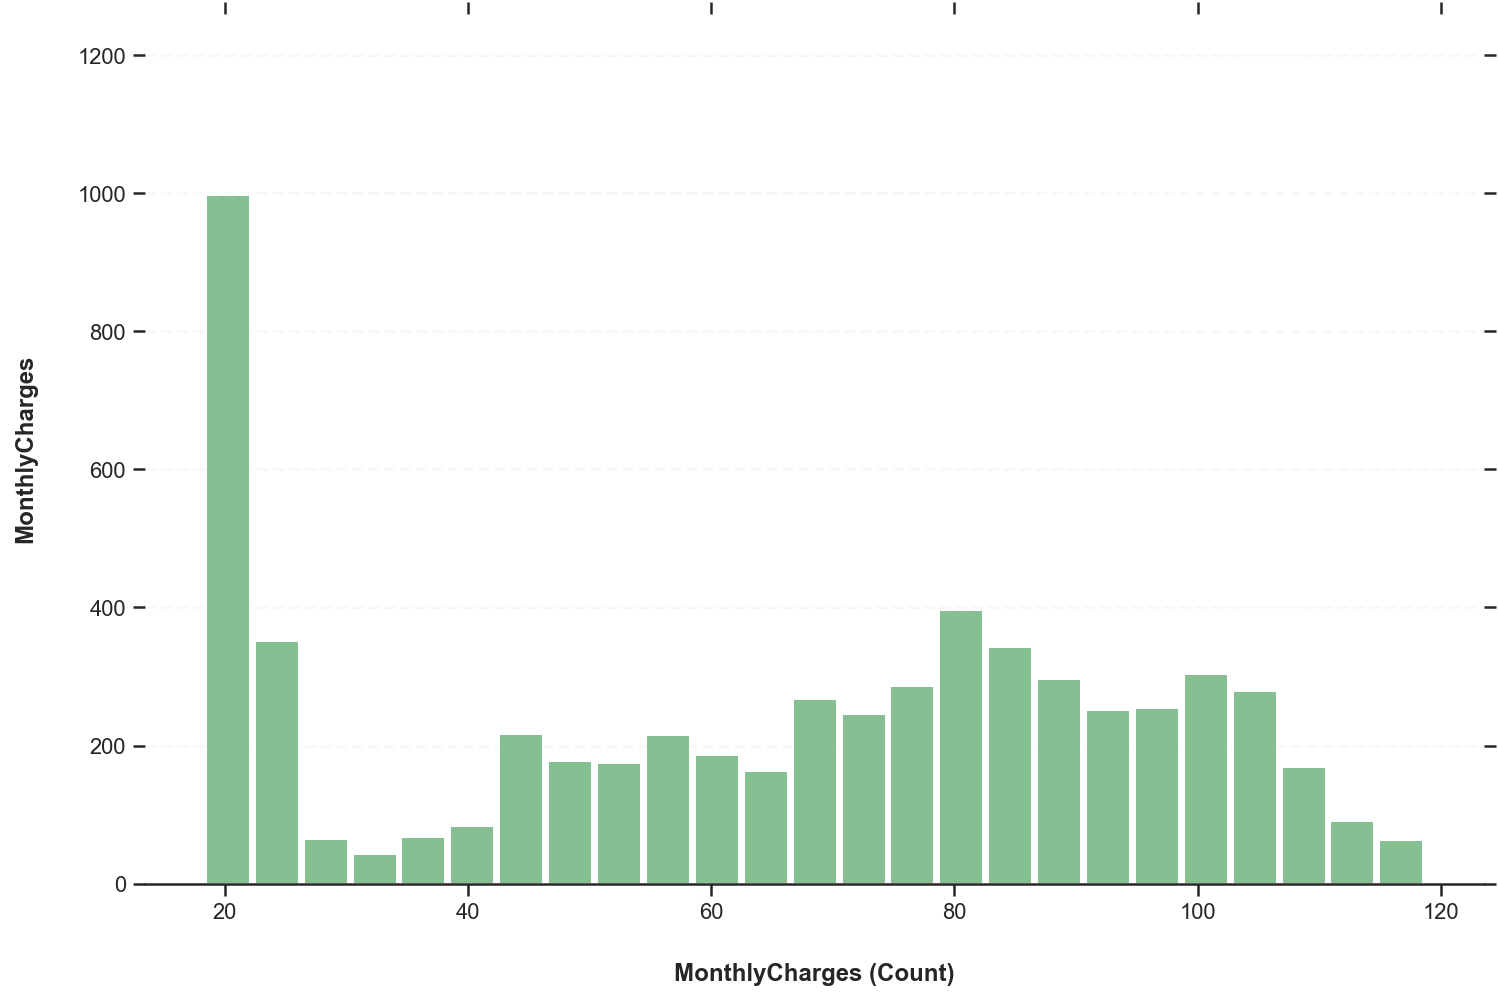

In [52]:
ax = data.hist(column='MonthlyCharges', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:


    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

  
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


    x.set_title("")

    x.set_xlabel("MonthlyCharges (Count)", labelpad=20, weight='bold', size=12)

    x.set_ylabel("MonthlyCharges", labelpad=20, weight='bold', size=12)
